# Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing and Reading Data

In [2]:
df=pd.read_csv("C:\BIA\Project A\Warehouse_and_Retail_Sales.csv")

In [3]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


# Cleaning Dataset

In [5]:
# Checking for missing values
print("Missing values before cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64


In [6]:
# Filter rows where 'SUPPLIER' column is null
null_supplier_rows = df[df['SUPPLIER'].isnull()]

# Print the rows with missing 'SUPPLIER' values
print(null_supplier_rows)

        YEAR  MONTH SUPPLIER ITEM CODE           ITEM DESCRIPTION  \
106     2020      1      NaN       107  JIGGER MEASURE SHOT GLASS   
188     2020      1      NaN       113     BARTENDERS BLACK  BOOK   
231     2020      1      NaN       115    PLASTIC SHOT GLASS PACK   
252     2020      1      NaN       117    WHISKEY TASTING JOURNAL   
261     2020      1      NaN       118    PLASTIC WINE GLASS PACK   
...      ...    ...      ...       ...                        ...   
306784  2020      9      NaN         4                   RMS ITEM   
307259  2020      9      NaN       118    PLASTIC WINE GLASS PACK   
307304  2020      9      NaN       107  JIGGER MEASURE SHOT GLASS   
307601  2020      9      NaN        WC                WINE CREDIT   
307605  2020      9      NaN       115    PLASTIC SHOT GLASS PACK   

           ITEM TYPE  RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  
106     STR_SUPPLIES         14.69              18.0              0.0  
188     STR_SUPPLIES       

In [7]:
df = df.dropna(subset=['SUPPLIER'])

# print the cleaned data to verify
print(df)

        YEAR  MONTH                           SUPPLIER ITEM CODE  \
0       2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1       2020      1                          PWSWN INC    100024   
2       2020      1            RELIABLE CHURCHILL LLLP      1001   
3       2020      1          LANTERNA DISTRIBUTORS INC    100145   
4       2020      1               DIONYSOS IMPORTS INC    100293   
...      ...    ...                                ...       ...   
307640  2020      9                           DOPS INC     97896   
307641  2020      9                 ANHEUSER BUSCH INC     97918   
307642  2020      9                       HEINEKEN USA     97942   
307643  2020      9            RELIABLE CHURCHILL LLLP     97950   
307644  2020      9            RELIABLE CHURCHILL LLLP     97969   

                                   ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                               BOOTLEG RED - 750ML      WINE          0.00   
1                        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307478 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307478 non-null  int64  
 1   MONTH             307478 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307478 non-null  object 
 4   ITEM DESCRIPTION  307478 non-null  object 
 5   ITEM TYPE         307477 non-null  object 
 6   RETAIL SALES      307478 non-null  float64
 7   RETAIL TRANSFERS  307478 non-null  float64
 8   WAREHOUSE SALES   307478 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ MB


In [9]:
# Drop rows where 'ITEM TYPE' column is null
df = df.dropna(subset=['ITEM TYPE'])

# Print the cleaned data to verify
print(df)

        YEAR  MONTH                           SUPPLIER ITEM CODE  \
0       2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1       2020      1                          PWSWN INC    100024   
2       2020      1            RELIABLE CHURCHILL LLLP      1001   
3       2020      1          LANTERNA DISTRIBUTORS INC    100145   
4       2020      1               DIONYSOS IMPORTS INC    100293   
...      ...    ...                                ...       ...   
307640  2020      9                           DOPS INC     97896   
307641  2020      9                 ANHEUSER BUSCH INC     97918   
307642  2020      9                       HEINEKEN USA     97942   
307643  2020      9            RELIABLE CHURCHILL LLLP     97950   
307644  2020      9            RELIABLE CHURCHILL LLLP     97969   

                                   ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                               BOOTLEG RED - 750ML      WINE          0.00   
1                        

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307477 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307477 non-null  int64  
 1   MONTH             307477 non-null  int64  
 2   SUPPLIER          307477 non-null  object 
 3   ITEM CODE         307477 non-null  object 
 4   ITEM DESCRIPTION  307477 non-null  object 
 5   ITEM TYPE         307477 non-null  object 
 6   RETAIL SALES      307477 non-null  float64
 7   RETAIL TRANSFERS  307477 non-null  float64
 8   WAREHOUSE SALES   307477 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ MB


In [11]:
# Step 1: Update 'ITEM TYPE', 'Group', and 'Bullion' where 'ITEM DESCRIPTION' contains 'STORE SPECIAL LIQUOR', ignoring case sensitivity
df.loc[df['ITEM DESCRIPTION'].str.contains("STORE SPECIAL LIQUOR", case=False, na=False), ['ITEM TYPE', 'Group', 'Bullion']] = ['LIQUOR', 'Spirits', 1]

# Step 2: Print a sample of the updated DataFrame to verify
print(df[df['ITEM DESCRIPTION'].str.contains("STORE SPECIAL LIQUOR", case=False, na=False)].head())

        YEAR  MONTH SUPPLIER ITEM CODE                   ITEM DESCRIPTION  \
178945  2019      2  Default     48011  STORE SPECIAL LIQUOR 1 LITER - 1L   

       ITEM TYPE  RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES    Group  \
178945    LIQUOR          1.82               0.0              0.0  Spirits   

        Bullion  
178945      1.0  


# Initail Clustering of both Spitits and Others

In [12]:
# Selecting relevant features for clustering
features = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]

In [13]:
 #Step 1: Define a function that groups the items into 'Spirits'
def group_by_spirits(item_type):
    if item_type in ['WINE', 'BEER', 'LIQUOR']:
        return 'Spirits'
    else:
        return 'Other'

# Step 2: Apply the function to the 'ITEM TYPE' column to create the new 'Group' column
df['Group'] = df['ITEM TYPE'].apply(group_by_spirits)

# Step 3: Reorder columns to place 'Group' after 'ITEM TYPE'
cols = df.columns.tolist()
# Find the position of 'ITEM TYPE' and insert 'Group' after it
item_type_index = cols.index('ITEM TYPE')
cols.insert(item_type_index + 1, cols.pop(cols.index('Group')))

# Reorder the DataFrame with the new column order
df = df[cols]

In [14]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,Group,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,Bullion
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,Spirits,0.00,0.0,2.0,NaN
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,Spirits,0.00,1.0,4.0,NaN
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,Spirits,0.00,0.0,1.0,NaN
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,Spirits,0.00,0.0,1.0,NaN
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,Spirits,0.82,0.0,0.0,NaN


C:\Users\amarh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amarh\AppData\Local\Temp\ipykernel_17536\4022000525.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spirits['Cluster'] = kmeans_spirits.fit_predict(scaled_features_spirits)
C:\Users\amarh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amarh\A

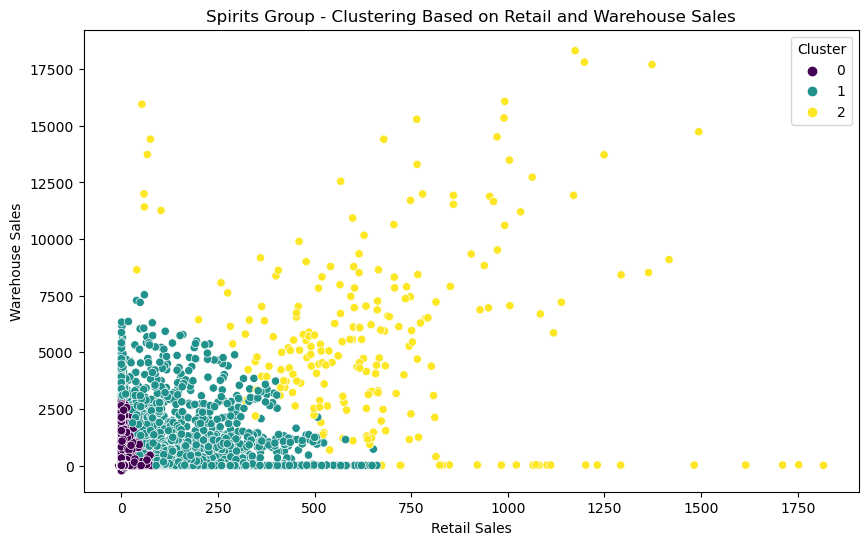

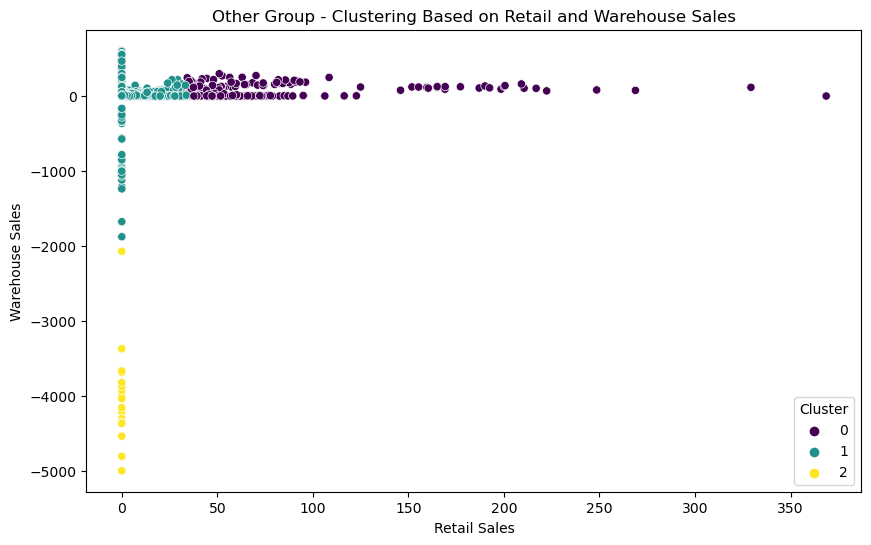

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE    Group  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE  Spirits          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE  Spirits          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER  Spirits          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE  Spirits          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE  Spirits          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  Bullion  Cluster  
0               0.0              2.0      NaN        0  
1               1.0              4.0      NaN        0  

In [15]:
# Step 1: Filter the data based on 'Group' column (Spirits vs Other)
df_spirits = df[df['Group'] == 'Spirits']
df_other = df[df['Group'] == 'Other']

# Step 2: Select the numerical features for clustering
features_spirits = df_spirits[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]
features_other = df_other[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_features_spirits = scaler.fit_transform(features_spirits)
scaled_features_other = scaler.fit_transform(features_other)

# Step 4: Apply KMeans clustering for Spirits
kmeans_spirits = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df_spirits['Cluster'] = kmeans_spirits.fit_predict(scaled_features_spirits)

# Step 5: Apply KMeans clustering for Other
kmeans_other = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df_other['Cluster'] = kmeans_other.fit_predict(scaled_features_other)

# Step 6: Visualize Clusters for Spirits Group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_spirits, x='RETAIL SALES', y='WAREHOUSE SALES', hue='Cluster', palette='viridis')
plt.title('Spirits Group - Clustering Based on Retail and Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.show()

# Step 7: Visualize Clusters for Other Group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_other, x='RETAIL SALES', y='WAREHOUSE SALES', hue='Cluster', palette='viridis')
plt.title('Other Group - Clustering Based on Retail and Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.show()

# Optional: Combine both groups back into one DataFrame with their respective clusters
df_combined = pd.concat([df_spirits, df_other])

# Print the first few rows to check the result
print(df_combined.head())

In [16]:
# Step 1: Add a new column 'Bullion' based on the 'Group' column
df['Bullion'] = df['Group'].apply(lambda x: 1 if x == 'Spirits' else 0)

# Step 2: Reorder the columns to place 'Bullion' next to 'Group'
cols = df.columns.tolist()
group_index = cols.index('Group')
# Move 'Bullion' to the position right after 'Group'
cols.insert(group_index + 1, cols.pop(cols.index('Bullion')))
df = df[cols]

# Print the updated DataFrame to verify
print(df.head())

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE    Group  Bullion  \
0                  BOOTLEG RED - 750ML      WINE  Spirits        1   
1            MOMENT DE PLAISIR - 750ML      WINE  Spirits        1   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER  Spirits        1   
3        SCHLINK HAUS KABINETT - 750ML      WINE  Spirits        1   
4       SANTORINI GAVALA WHITE - 750ML      WINE  Spirits        1   

   RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  
0          0.00               0.0              2.0  
1          0.00               1.0              4.0  
2          0.00               0.0        

In [17]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,Group,Bullion,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,Spirits,1,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,Spirits,1,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,Spirits,1,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,Spirits,1,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,Spirits,1,0.82,0.0,0.0


# Enhanced Data Cleaning

In [18]:
# Step 1: Update 'ITEM TYPE', 'Group', and 'Bullion' where 'ITEM DESCRIPTION' contains 'STORE SPECIAL BEER QUART', ignoring case sensitivity
df.loc[df['ITEM DESCRIPTION'].str.contains("STORE SPECIAL BEER QUART", case=False, na=False), ['ITEM TYPE', 'Group', 'Bullion']] = ['BEER', 'Spirits', 1]

# Step 2: Print a sample of the updated DataFrame to verify
print(df[df['ITEM DESCRIPTION'].str.contains("STORE SPECIAL BEER QUART", case=False, na=False)].head())

        YEAR  MONTH SUPPLIER ITEM CODE          ITEM DESCRIPTION ITEM TYPE  \
85838   2017      9  Default     59978  STORE SPECIAL BEER QUART      BEER   
99481   2017     10  Default     59978  STORE SPECIAL BEER QUART      BEER   
141904  2018      1  Default     59978  STORE SPECIAL BEER QUART      BEER   
192258  2019      3  Default     59978  STORE SPECIAL BEER QUART      BEER   
205022  2019      4  Default     59978  STORE SPECIAL BEER QUART      BEER   

          Group  Bullion  RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  
85838   Spirits        1          0.74               0.0              0.0  
99481   Spirits        1          0.25               0.0              0.0  
141904  Spirits        1          0.34               0.0              0.0  
192258  Spirits        1          0.49               0.0              0.0  
205022  Spirits        1          1.41               0.0              0.0  


In [19]:
# Step 1: Update 'ITEM TYPE', 'Group', and 'Bullion' where 'ITEM DESCRIPTION' contains 'STORE SPECIAL WINE', ignoring case sensitivity
df.loc[df['ITEM DESCRIPTION'].str.contains("STORE SPECIAL WINE", case=False, na=False), ['ITEM TYPE', 'Group', 'Bullion']] = ['WINE', 'Spirits', 1]

# Step 2: Print a sample of the updated DataFrame to verify
print(df[df['ITEM DESCRIPTION'].str.contains("STORE SPECIAL WINE", case=False, na=False)].head())

       YEAR  MONTH SUPPLIER ITEM CODE                   ITEM DESCRIPTION  \
8434   2020      1  Default     59781  STORE SPECIAL WINE 750 ML - 750ML   
45773  2017      6  Default     59668  STORE SPECIAL WINE 355 ML - 355ML   
45775  2017      6  Default     59781  STORE SPECIAL WINE 750 ML - 750ML   
58875  2017      7  Default     59668  STORE SPECIAL WINE 355 ML - 355ML   
58877  2017      7  Default     59781  STORE SPECIAL WINE 750 ML - 750ML   

      ITEM TYPE    Group  Bullion  RETAIL SALES  RETAIL TRANSFERS  \
8434       WINE  Spirits        1         -0.08               0.0   
45773      WINE  Spirits        1          8.55               0.0   
45775      WINE  Spirits        1          1.65               0.0   
58875      WINE  Spirits        1         22.78               0.0   
58877      WINE  Spirits        1         23.84               0.0   

       WAREHOUSE SALES  
8434               0.0  
45773              0.0  
45775              0.0  
58875              0.0  
588

In [20]:
# Step 1: Apply ceiling function to round up the values in the specified columns
df['RETAIL SALES'] = np.ceil(df['RETAIL SALES'])
df['RETAIL TRANSFERS'] = np.ceil(df['RETAIL TRANSFERS'])
df['WAREHOUSE SALES'] = np.ceil(df['WAREHOUSE SALES'])

# Step 2: Print the updated DataFrame to verify
print(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].head())

   RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
0           0.0               0.0              2.0
1           0.0               1.0              4.0
2           0.0               0.0              1.0
3           0.0               0.0              1.0
4           1.0               0.0              0.0


# Comprehensive Clustering

C:\Users\amarh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amarh\AppData\Local\Temp\ipykernel_17536\518258880.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spirits['Cluster'] = kmeans_spirits.fit_predict(scaled_features_spirits)
C:\Users\amarh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amarh\Ap

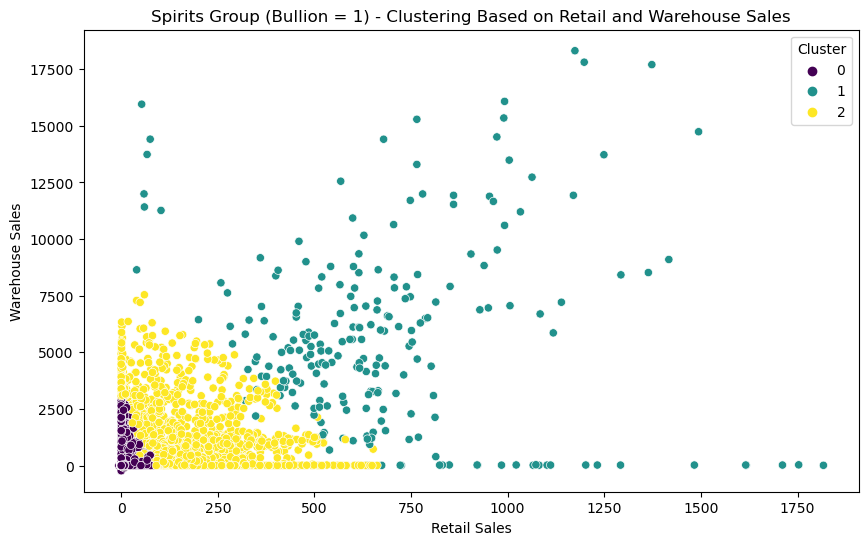

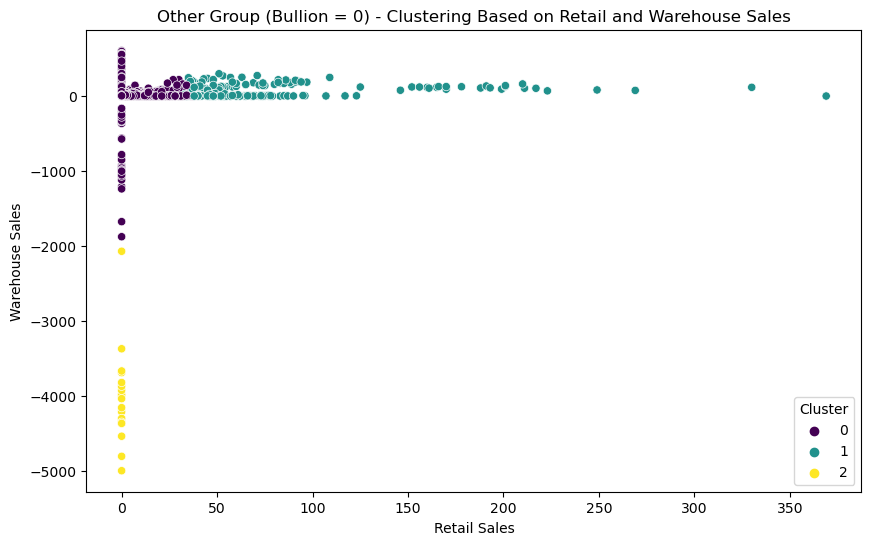

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE    Group  Bullion  \
0                  BOOTLEG RED - 750ML      WINE  Spirits        1   
1            MOMENT DE PLAISIR - 750ML      WINE  Spirits        1   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER  Spirits        1   
3        SCHLINK HAUS KABINETT - 750ML      WINE  Spirits        1   
4       SANTORINI GAVALA WHITE - 750ML      WINE  Spirits        1   

   RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  Cluster  
0           0.0               0.0              2.0        0  
1           0.0               1.0              4.0        0  
2           0.

In [21]:
# Step 1: Filter the data based on 'Bullion' column (1 for Spirits, 0 for Other)
df_spirits = df[df['Bullion'] == 1]  # Spirits group (Bullion = 1)
df_other = df[df['Bullion'] == 0]    # Other group (Bullion = 0)

# Step 2: Select the numerical features for clustering
features_spirits = df_spirits[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]
features_other = df_other[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_features_spirits = scaler.fit_transform(features_spirits)
scaled_features_other = scaler.fit_transform(features_other)

# Step 4: Apply KMeans clustering for Spirits (Bullion = 1)
kmeans_spirits = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df_spirits['Cluster'] = kmeans_spirits.fit_predict(scaled_features_spirits)

# Step 5: Apply KMeans clustering for Other (Bullion = 0)
kmeans_other = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df_other['Cluster'] = kmeans_other.fit_predict(scaled_features_other)

# Step 6: Visualize Clusters for Spirits Group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_spirits, x='RETAIL SALES', y='WAREHOUSE SALES', hue='Cluster', palette='viridis')
plt.title('Spirits Group (Bullion = 1) - Clustering Based on Retail and Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.show()

# Step 7: Visualize Clusters for Other Group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_other, x='RETAIL SALES', y='WAREHOUSE SALES', hue='Cluster', palette='viridis')
plt.title('Other Group (Bullion = 0) - Clustering Based on Retail and Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.show()

# Optional: Combine both groups back into one DataFrame with their respective clusters
df_combined = pd.concat([df_spirits, df_other])

# Print the first few rows to check the result
print(df_combined.head())

In [22]:
# Step 1: Calculate total sales for each item type excluding 'RETAIL TRANSFERS'
# We will sum only 'RETAIL SALES' and 'WAREHOUSE SALES' for each 'ITEM TYPE'
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

# Step 2: Group by 'ITEM TYPE' and calculate the total sum for each type
total_sales_by_item_type = df.groupby('ITEM TYPE')['TOTAL SALES'].sum().reset_index()

# Step 3: Print the result
print(total_sales_by_item_type)

      ITEM TYPE  TOTAL SALES
0          BEER    7110919.0
1       DUNNAGE    -121307.0
2          KEGS     118431.0
3        LIQUOR     931981.0
4   NON-ALCOHOL      54137.0
5           REF        457.0
6  STR_SUPPLIES       2321.0
7          WINE    1961467.0


In [23]:
# Step 1: Calculate total sales for each item type excluding 'RETAIL TRANSFERS'
# We will sum only 'RETAIL SALES' and 'WAREHOUSE SALES'
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

# Step 2: Group by 'ITEM TYPE', 'Group', and 'Bullion', and calculate the total sales
total_sales_grouped = df.groupby(['ITEM TYPE', 'Group'])['TOTAL SALES'].sum().reset_index()

# Step 3: Print the result
print(total_sales_grouped)

      ITEM TYPE    Group  TOTAL SALES
0          BEER  Spirits    7110919.0
1       DUNNAGE    Other    -121307.0
2          KEGS    Other     118431.0
3        LIQUOR  Spirits     931981.0
4   NON-ALCOHOL    Other      54137.0
5           REF    Other        457.0
6  STR_SUPPLIES    Other       2321.0
7          WINE  Spirits    1961467.0


In [24]:
# Step 1: Convert negative values to positive using abs() function
df['RETAIL SALES'] = df['RETAIL SALES'].abs()
df['RETAIL TRANSFERS'] = df['RETAIL TRANSFERS'].abs()
df['WAREHOUSE SALES'] = df['WAREHOUSE SALES'].abs()
df['TOTAL SALES'] = df['TOTAL SALES'].abs()

# Step 2: Print the updated DataFrame to verify the changes
print(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'TOTAL SALES']].head())


   RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  TOTAL SALES
0           0.0               0.0              2.0          2.0
1           0.0               1.0              4.0          4.0
2           0.0               0.0              1.0          1.0
3           0.0               0.0              1.0          1.0
4           1.0               0.0              0.0          1.0


# Data Filtering

In [25]:
# Step 1: Update 'ITEM TYPE' from 'REF' to 'STR_SUPPLIES'
df.loc[df['ITEM TYPE'] == 'REF', 'ITEM TYPE'] = 'STR_SUPPLIES'

# Step 2: Print the updated DataFrame to verify the change
print(df[df['ITEM TYPE'] == 'STR_SUPPLIES'].head())

     YEAR  MONTH SUPPLIER ITEM CODE                      ITEM DESCRIPTION  \
24   2020      1  Default       102                  TWO BOTTLE WINE TOTE   
48   2020      1  Default       104                 FOUR BOTTLE WINE TOTE   
77   2020      1  Default       105          WINE GIFT TOTE SINGLE BOTTLE   
85   2020      1  Default       106        SIX BOTTLE WINE TOTE (NO LOGO)   
135  2020      1  Default       109  WINE TOTE WOOD HANDLE 2 POCKET 4 BTL   

        ITEM TYPE  Group  Bullion  RETAIL SALES  RETAIL TRANSFERS  \
24   STR_SUPPLIES  Other        0           1.0               0.0   
48   STR_SUPPLIES  Other        0           1.0               0.0   
77   STR_SUPPLIES  Other        0          11.0               0.0   
85   STR_SUPPLIES  Other        0           3.0               6.0   
135  STR_SUPPLIES  Other        0           3.0               0.0   

     WAREHOUSE SALES  TOTAL SALES  
24               0.0          1.0  
48               0.0          1.0  
77            

In [26]:
# Step 1: Calculate total sales for each item type excluding 'RETAIL TRANSFERS'
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

# Step 2: Group by 'ITEM TYPE', 'Group', and 'Bullion', and calculate the total sales
total_sales_grouped = df.groupby(['ITEM TYPE', 'Group', 'Bullion'])['TOTAL SALES'].sum().reset_index()

# Step 3: Filter the rows where 'Group' is 'Spirits'
total_sales_spirits = total_sales_grouped[total_sales_grouped['Group'] == 'Spirits']

# Step 4: Print the filtered result
print(total_sales_spirits)

  ITEM TYPE    Group  Bullion  TOTAL SALES
0      BEER  Spirits        1    7112425.0
3    LIQUOR  Spirits        1     932185.0
6      WINE  Spirits        1    1962355.0


In [27]:
# Step 1: Calculate total sales for each item type excluding 'RETAIL TRANSFERS'
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

# Step 2: Group by 'MONTH', 'ITEM TYPE', 'Group', and 'Bullion', and calculate the total sales
total_sales_month_wise = df.groupby(['MONTH', 'ITEM TYPE', 'Group', 'Bullion'])['TOTAL SALES'].sum().reset_index()

# Step 3: Print the result (grouped by month)
print(total_sales_month_wise)

    MONTH     ITEM TYPE    Group  Bullion  TOTAL SALES
0       1          BEER  Spirits        1     725958.0
1       1       DUNNAGE    Other        0      15956.0
2       1          KEGS    Other        0      14856.0
3       1        LIQUOR  Spirits        1     103229.0
4       1   NON-ALCOHOL    Other        0       5916.0
..    ...           ...      ...      ...          ...
79     12          KEGS    Other        0       4850.0
80     12        LIQUOR  Spirits        1      54576.0
81     12   NON-ALCOHOL    Other        0       2295.0
82     12  STR_SUPPLIES    Other        0        470.0
83     12          WINE  Spirits        1     108654.0

[84 rows x 5 columns]


In [28]:
# Step 1: Delete rows where both 'TOTAL SALES' and 'RETAIL TRANSFERS' are 0
df= df[~((df['TOTAL SALES'] == 0) & (df['RETAIL TRANSFERS'] == 0))]

# Step 2: Print the updated DataFrame to verify the changes
print(df.head())

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE    Group  Bullion  \
0                  BOOTLEG RED - 750ML      WINE  Spirits        1   
1            MOMENT DE PLAISIR - 750ML      WINE  Spirits        1   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER  Spirits        1   
3        SCHLINK HAUS KABINETT - 750ML      WINE  Spirits        1   
4       SANTORINI GAVALA WHITE - 750ML      WINE  Spirits        1   

   RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  TOTAL SALES  
0           0.0               0.0              2.0          2.0  
1           0.0               1.0              4.0          4.0  
2 

In [29]:
# Print the unique list of 'ITEM TYPE' values from the DataFrame
item_type_list = df['ITEM TYPE'].unique()

# Display the list of item types
print("List of unique ITEM TYPE values:")
print(item_type_list)

List of unique ITEM TYPE values:
['WINE' 'BEER' 'LIQUOR' 'STR_SUPPLIES' 'KEGS' 'NON-ALCOHOL' 'DUNNAGE']


In [30]:
# Print the unique list of 'ITEM TYPE' values from the DataFrame
item_type_list = df['ITEM TYPE'].unique()

# Display the list of item types
print("List of unique ITEM TYPE values:")
print(item_type_list)

List of unique ITEM TYPE values:
['WINE' 'BEER' 'LIQUOR' 'STR_SUPPLIES' 'KEGS' 'NON-ALCOHOL' 'DUNNAGE']


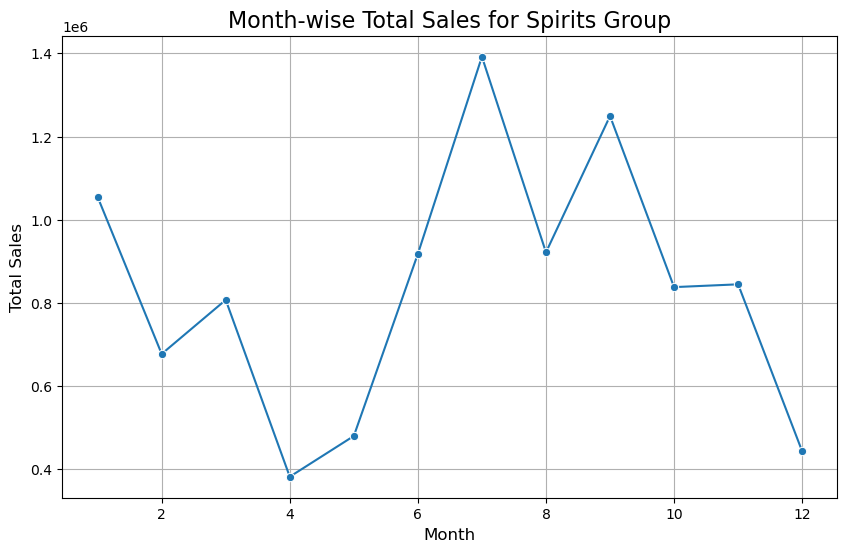

In [31]:
# Step 1: Calculate total sales excluding 'RETAIL TRANSFERS'
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

# Step 2: Filter the data for the 'Spirits' group
df_spirits = df[df['Group'] == 'Spirits']

# Step 3: Group by 'MONTH' and sum total sales for the 'Spirits' group
monthwise_sales_spirits = df_spirits.groupby('MONTH')['TOTAL SALES'].sum().reset_index()

# Step 4: Plot the graph using Seaborn or Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthwise_sales_spirits, x='MONTH', y='TOTAL SALES', marker='o')

# Add titles and labels
plt.title('Month-wise Total Sales for Spirits Group', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()

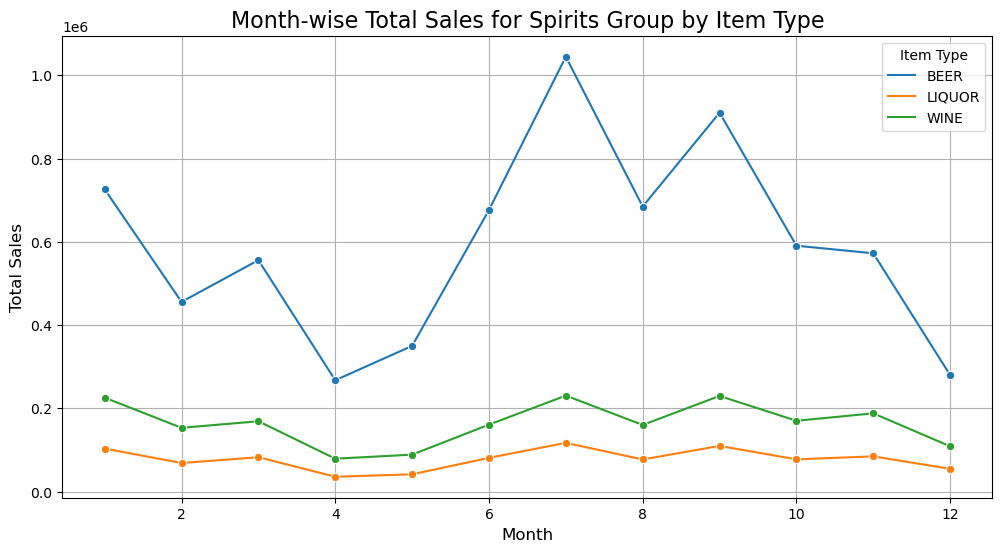

In [32]:
# Step 1: Calculate total sales excluding 'RETAIL TRANSFERS'
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

# Step 2: Filter the data for the 'Spirits' group
df_spirits = df[df['Group'] == 'Spirits']

# Step 3: Group by 'MONTH' and 'ITEM TYPE', and sum total sales for each
monthwise_sales_item_type = df_spirits.groupby(['MONTH', 'ITEM TYPE'])['TOTAL SALES'].sum().reset_index()

# Step 4: Plot the graph with separate lines for each 'ITEM TYPE'
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthwise_sales_item_type, x='MONTH', y='TOTAL SALES', hue='ITEM TYPE', marker='o')

# Add titles and labels
plt.title('Month-wise Total Sales for Spirits Group by Item Type', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Display the plot
plt.grid(True)
plt.legend(title='Item Type', loc='upper right')
plt.show()

In [33]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,Group,Bullion,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,Spirits,1,0.0,0.0,2.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,Spirits,1,0.0,1.0,4.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,Spirits,1,0.0,0.0,1.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,Spirits,1,0.0,0.0,1.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,Spirits,1,1.0,0.0,0.0,1.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306102 entries, 0 to 307644
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              306102 non-null  int64  
 1   MONTH             306102 non-null  int64  
 2   SUPPLIER          306102 non-null  object 
 3   ITEM CODE         306102 non-null  object 
 4   ITEM DESCRIPTION  306102 non-null  object 
 5   ITEM TYPE         306102 non-null  object 
 6   Group             306102 non-null  object 
 7   Bullion           306102 non-null  int64  
 8   RETAIL SALES      306102 non-null  float64
 9   RETAIL TRANSFERS  306102 non-null  float64
 10  WAREHOUSE SALES   306102 non-null  float64
 11  TOTAL SALES       306102 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 30.4+ MB


# Monthwise Clustering

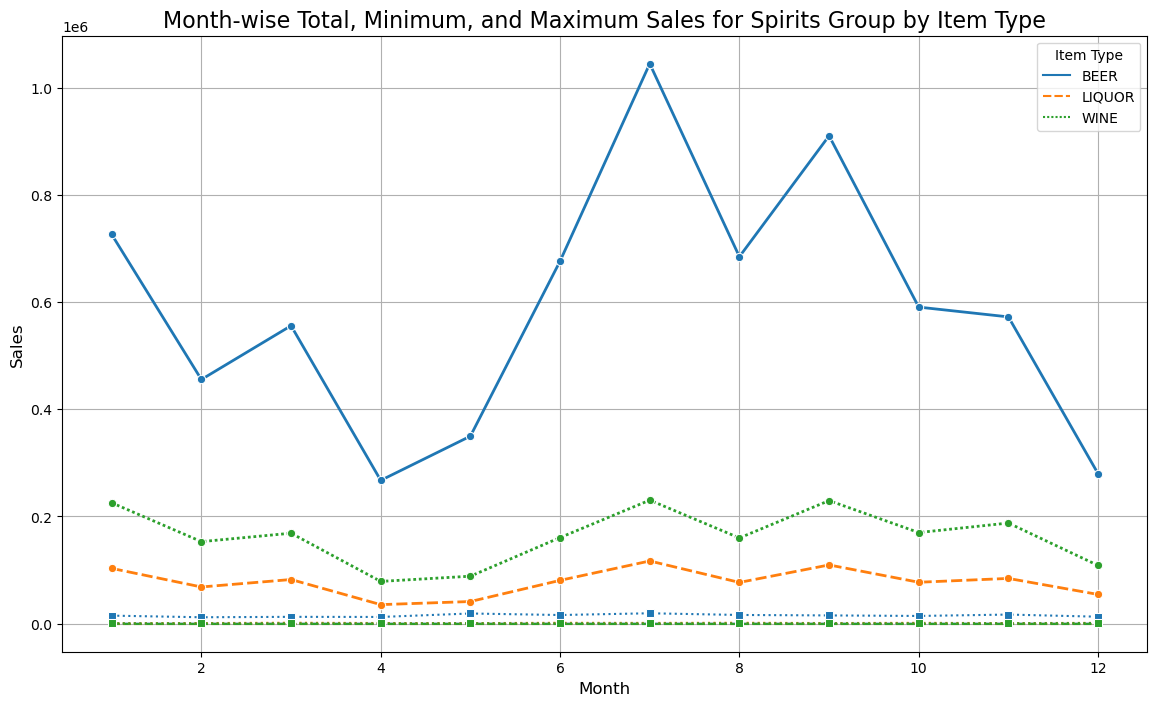

In [35]:
# Assuming 'df' is your DataFrame with 'Group', 'MONTH', 'ITEM TYPE', and sales columns

# Step 1: Calculate total sales excluding 'RETAIL TRANSFERS'
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

# Step 2: Filter the data for the 'Spirits' group
df_spirits = df[df['Group'] == 'Spirits']

# Step 3: Group by 'MONTH' and 'ITEM TYPE', and calculate total, minimum, and maximum sales for each
monthwise_sales_stats = df_spirits.groupby(['MONTH', 'ITEM TYPE']).agg(
    total_sales=('TOTAL SALES', 'sum'),
    min_sales=('TOTAL SALES', 'min'),
    max_sales=('TOTAL SALES', 'max')
).reset_index()

# Step 4: Plot the graph with separate lines for total, minimum, and maximum sales for each 'ITEM TYPE'
plt.figure(figsize=(14, 8))

# Plot total sales
sns.lineplot(data=monthwise_sales_stats, x='MONTH', y='total_sales', hue='ITEM TYPE', marker='o', style='ITEM TYPE', linewidth=2)
# Plot minimum sales
sns.lineplot(data=monthwise_sales_stats, x='MONTH', y='min_sales', hue='ITEM TYPE', marker='x', linestyle='--', legend=False)
# Plot maximum sales
sns.lineplot(data=monthwise_sales_stats, x='MONTH', y='max_sales', hue='ITEM TYPE', marker='s', linestyle=':', legend=False)

# Add titles and labels
plt.title('Month-wise Total, Minimum, and Maximum Sales for Spirits Group by Item Type', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Display the plot
plt.grid(True)
plt.legend(title='Item Type', loc='upper right')
plt.show()

In [36]:
df.to_csv('monthwise_sales.csv', index=False)

In [37]:
# Step 1: Apply ceiling function to round up the values in the specified columns
df['RETAIL SALES'] = np.ceil(df['RETAIL SALES'])
df['RETAIL TRANSFERS'] = np.ceil(df['RETAIL TRANSFERS'])
df['WAREHOUSE SALES'] = np.ceil(df['WAREHOUSE SALES'])
df['TOTAL SALES'] = np.ceil(df['TOTAL SALES'])

# Step 2: Print the updated DataFrame to verify
print(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'TOTAL SALES']].head())

   RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  TOTAL SALES
0           0.0               0.0              2.0          2.0
1           0.0               1.0              4.0          4.0
2           0.0               0.0              1.0          1.0
3           0.0               0.0              1.0          1.0
4           1.0               0.0              0.0          1.0


In [38]:
# Step 1: Find the row with the maximum 'TOTAL SALES'
max_sold_item = df.loc[df['TOTAL SALES'].idxmax()]

# Step 2: Display the item with the maximum 'TOTAL SALES'
print("Item with Maximum Sales:")
print(f"Item Description: {max_sold_item['ITEM DESCRIPTION']}")
print(f"Total Sales: {max_sold_item['TOTAL SALES']}")
print(f"Group: {max_sold_item['Group']}")
print(f"Item Type: {max_sold_item['ITEM TYPE']}")

Item with Maximum Sales:
Item Description: CORONA EXTRA LOOSE NR - 12OZ
Total Sales: 19491.0
Group: Spirits
Item Type: BEER


In [39]:
# Step 1: Calculate total sales excluding 'RETAIL TRANSFERS'
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

# Step 2: Filter the data for the 'Others' group
df_others = df[df['Group'] == 'Other']

# Step 3: Group by 'ITEM TYPE' for the 'Others' group and sum total sales
total_sales_others_item_type = df_others.groupby('ITEM TYPE')['TOTAL SALES'].sum().reset_index()

# Step 4: Print the result
print(total_sales_others_item_type)

      ITEM TYPE  TOTAL SALES
0       DUNNAGE     121307.0
1          KEGS     118815.0
2   NON-ALCOHOL      54155.0
3  STR_SUPPLIES       2778.0


In [40]:
# Step 1: Calculate the correlation between 'Bullion' and sales columns
correlation_matrix = df[['Bullion', 'RETAIL SALES', 'WAREHOUSE SALES', 'TOTAL SALES']].corr()

# Step 2: Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  Bullion  RETAIL SALES  WAREHOUSE SALES  TOTAL SALES
Bullion          1.000000      0.032801         0.003890     0.007399
RETAIL SALES     0.032801      1.000000         0.499822     0.583153
WAREHOUSE SALES  0.003890      0.499822         1.000000     0.995083
TOTAL SALES      0.007399      0.583153         0.995083     1.000000


In [41]:
# Step 1: Sort the DataFrame by 'YEAR' and then by 'MONTH'
df= df.sort_values(by=['YEAR', 'MONTH'])
# Step 2: Reset Index
df= df.reset_index(drop=True)

In [42]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,Group,Bullion,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
0,2017,6,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,Spirits,1,0.0,0.0,6.0,6.0
1,2017,6,DOPS INC,10004,ANYWHERE CELLARS ROSE,WINE,Spirits,1,0.0,0.0,1.0,1.0
2,2017,6,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,Spirits,1,0.0,0.0,1.0,1.0
3,2017,6,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,Spirits,1,1.0,0.0,0.0,1.0
4,2017,6,DIONYSOS IMPORTS INC,100285,NAOUSSA RED WINE - 750ML,WINE,Spirits,1,0.0,0.0,1.0,1.0


In [53]:
df.to_csv('all_sales.csv', index=False)

C:\Users\amarh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


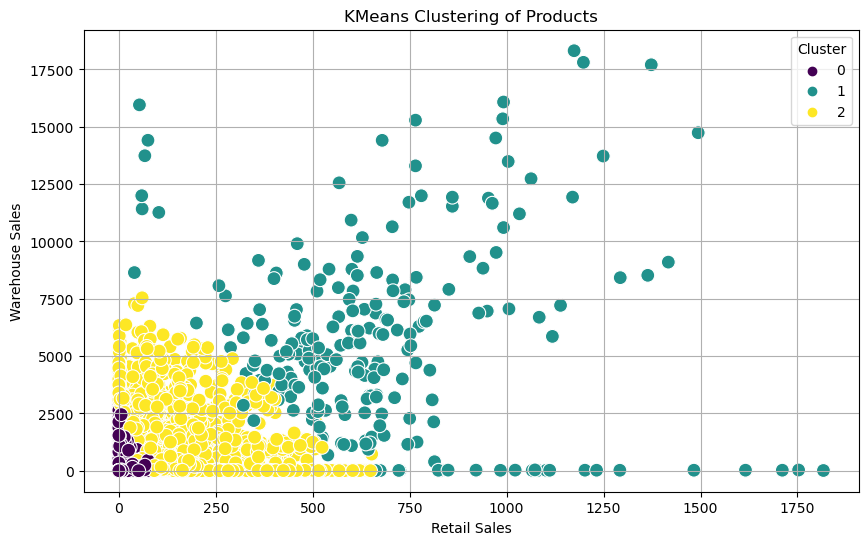

   RETAIL SALES  WAREHOUSE SALES  Cluster
0           0.0              6.0        0
1           0.0              1.0        0
2           0.0              1.0        0
3           1.0              0.0        0
4           0.0              1.0        0


In [44]:
# Step 1: Select relevant features for clustering
# Replace 'COLUMN_1', 'COLUMN_2' with the names of numeric columns relevant to clustering
features = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]  # Example

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters (e.g., 3)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RETAIL SALES', y='WAREHOUSE SALES', hue='Cluster', palette='viridis', s=100)
plt.title('KMeans Clustering of Products')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.grid(True)
plt.show()

# Optional: Print the cluster labels
print(df[['RETAIL SALES', 'WAREHOUSE SALES', 'Cluster']].head())


# Splittiong Data to DF1 (Only Spirits 'BEER,WINE,Liquor')

In [45]:
# Step 1: Drop rows where 'Bullion' is 0
df1 = df[df['Bullion'] != 0]

# Step 2: Print the updated DataFrame to verify the changes
print(df1.head())

# Optionally, you can save the cleaned DataFrame to a new CSV file
output_file_path = 'cleaned_bullion_output.csv'  # Specify your desired output file name
df1.to_csv(output_file_path, index=False)

print(f"Cleaned data (without rows where Bullion is 0) has been exported to {output_file_path}")


   YEAR  MONTH                   SUPPLIER ITEM CODE  \
0  2017      6    INTERBALT PRODUCTS CORP    100012   
1  2017      6                   DOPS INC     10004   
2  2017      6  LANTERNA DISTRIBUTORS INC    100145   
3  2017      6            ROYAL WINE CORP    100200   
4  2017      6       DIONYSOS IMPORTS INC    100285   

                ITEM DESCRIPTION ITEM TYPE    Group  Bullion  RETAIL SALES  \
0            PAPI P/GRIG - 750ML      WINE  Spirits        1           0.0   
1          ANYWHERE CELLARS ROSE      WINE  Spirits        1           0.0   
2  SCHLINK HAUS KABINETT - 750ML      WINE  Spirits        1           0.0   
3              GAMLA CAB - 750ML      WINE  Spirits        1           1.0   
4       NAOUSSA RED WINE - 750ML      WINE  Spirits        1           0.0   

   RETAIL TRANSFERS  WAREHOUSE SALES  TOTAL SALES  Cluster  
0               0.0              6.0          6.0        0  
1               0.0              1.0          1.0        0  
2               0

In [46]:
df1.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,Group,Bullion,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,Cluster
0,2017,6,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,Spirits,1,0.0,0.0,6.0,6.0,0
1,2017,6,DOPS INC,10004,ANYWHERE CELLARS ROSE,WINE,Spirits,1,0.0,0.0,1.0,1.0,0
2,2017,6,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,Spirits,1,0.0,0.0,1.0,1.0,0
3,2017,6,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,Spirits,1,1.0,0.0,0.0,1.0,0
4,2017,6,DIONYSOS IMPORTS INC,100285,NAOUSSA RED WINE - 750ML,WINE,Spirits,1,0.0,0.0,1.0,1.0,0


C:\Users\amarh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amarh\AppData\Local\Temp\ipykernel_17536\2728515052.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster'] = kmeans.fit_predict(scaled_features)


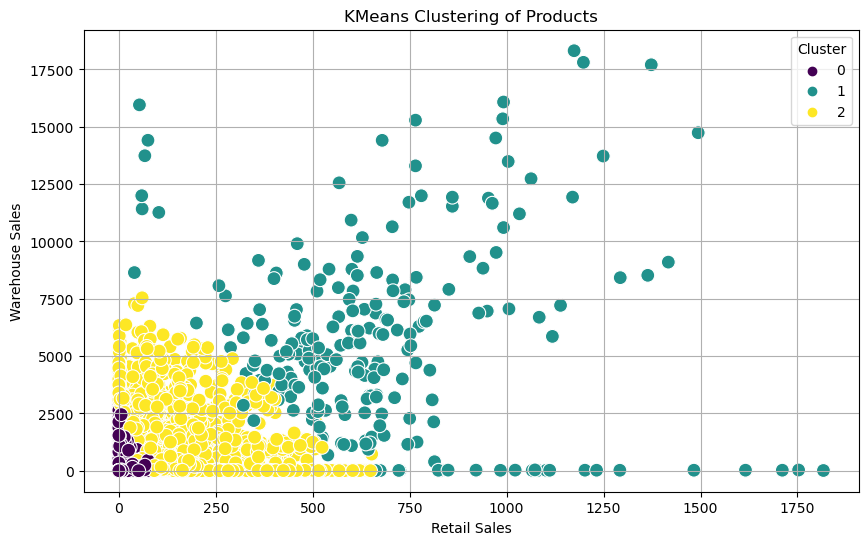

   RETAIL SALES  WAREHOUSE SALES  Cluster
0           0.0              6.0        0
1           0.0              1.0        0
2           0.0              1.0        0
3           1.0              0.0        0
4           0.0              1.0        0


In [51]:
# Step 1: Select relevant features for clustering
# Replace 'COLUMN_1', 'COLUMN_2' with the names of numeric columns relevant to clustering
features = df1[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]  # Example

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters (e.g., 3)
df1['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RETAIL SALES', y='WAREHOUSE SALES', hue='Cluster', palette='viridis', s=100)
plt.title('KMeans Clustering of Products')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.grid(True)
plt.show()

# Optional: Print the cluster labels
print(df1[['RETAIL SALES', 'WAREHOUSE SALES', 'Cluster']].head())


In [52]:
df1.to_csv('spirits_sales.csv', index=False)